# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

Let us investigate this result. First, import the necessary modules and read the data.

In [2]:
%matplotlib notebook

# first, import all the necessary libraries and modules
from __future__ import print_function

import pandas as pd
import numpy as np               #%matplotlib qt
from pandas import read_csv
from pandas import datetime

import matplotlib.pyplot as plt    #from matplotlib import pyplot

from pandas.plotting import autocorrelation_plot as atp   # from pandas.tools.plotting import autocorrelation_plot

import scipy.stats as sts
import statsmodels.api as stm
import statsmodels.stats.api as sms

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from pandas import DataFrame
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

from pandas.tools.plotting import lag_plot
from pandas import TimeGrouper

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
t_nc = pd.read_csv('human_body_temperature.csv')     #  "c"=column-attributes in "t_nc", "t"=temperature, "n"=row-nr dimension
t_nc.shape

(130, 3)

In [31]:
t_nc.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


The size of the sample is 130, so it is sufficiently large (since it is larger than 30, a threshold convention when the sample distribution tails are considered normal). Temperature readings were taken from random people (not in the center of a flu epidemic), so we can consider observations independent and apply CLT (Central Limit Theorem). Let us examine if the sample distribution of temperatures is close to normal.

In [5]:
t_n=t_nc['temperature']    #t_n.head()  

In [6]:
# extract temperature series for males and females separetely
tm_nc=t_nc.loc[t_nc['gender'] == 'M']  # "tm_n"=male-temp-series  # tm_nc.head()
tm_n=tm_nc['temperature']              # tm_n.head()

# extract temp for females
tf_nc=t_nc.loc[t_nc['gender'] == 'F']  # "tm_n"=male-temp-series  # tm_nc.head()
tf_n=tf_nc['temperature']              # tm_n.head()


<IPython.core.display.Javascript object>


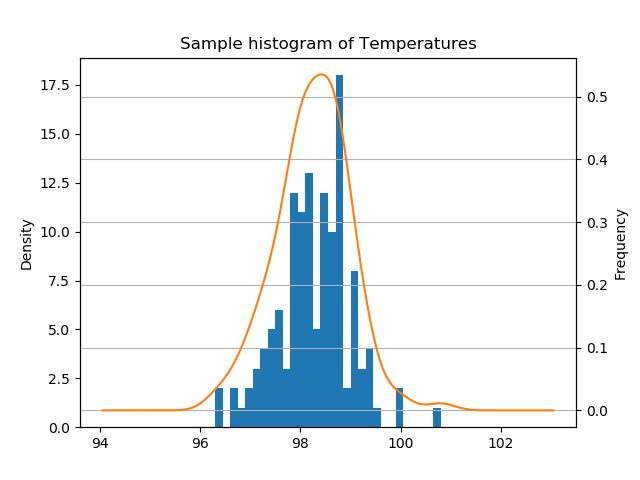

In [7]:
# plot a sample histogram
fig8 = plt.figure()
ax1 = t_n.plot(kind='hist', bins=30)    #.hist(bins=50)        # plt.hist(pr_t,50)      #

t_n.plot(kind='kde', ax = ax1, secondary_y=True)   # plot the probability density estimate

plt.title('Sample histogram of Temperatures')
plt.ylabel('Frequency')
plt.xlabel('T')
plt.grid(True)

<IPython.core.display.Javascript object>


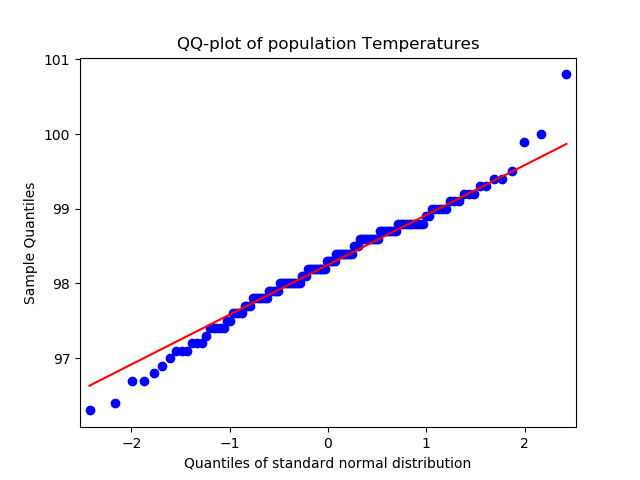

In [16]:
# make a qq-plot against a standard distribution of some type
#fig9 = plt.figure()
stm.qqplot(t_n, line='q')    # , stats.t, distargs=(5,) #, line='45' 

plt.title('QQ-plot of population Temperatures')
plt.xlabel('Quantiles of standard normal distribution')

So, we conclude that the sample distribution is close to normal. Next, let us calculate the sample mean.

In [11]:
# get the mean temperature
t_mu=round(t_n.mean(),1)

print('Sample mean temperature is ',t_mu,'F')

Sample mean temperature is  98.2 F


We want to test if this is a statistically significant result, given that the established temperature is 98.6 F. So, we can test the following null hypothesis, $H_o$, the true mean is 98.6 F, vs alternative hypothesis $H_a$ that the true mean is not 98.6 F. Formally:

$H_o: \mu_T = 98.6 $

$H_a: \mu_T \neq 98.6 $

We can perform this test via one sample t-test.

In [12]:
sts.ttest_1samp(t_n,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

We can see that, the p-value is very small, so we can reject the null hypothesis at 95% and even at 99% significance levels. Let us confirm this by looking at the confidence intervals, first at 95% level.

In [13]:
# get the 95% level confidence interval for t-static of the sample mean
sms.DescrStatsW(t_n).tconfint_mean()

(98.122002905608042, 98.376458632853513)

Standard error is:

In [28]:
sts.sem(t_n)

0.064304416837891024

In [14]:
# get the 95% level t-statistic through a different library
sts.t.interval(0.95, len(t_n)-1, loc=np.mean(t_n), scale=sts.sem(t_n))

(98.122002905608042, 98.376458632853513)

We got the same result with different library calls (as expected).

Let us find 95% confidence interval via normal Z-test (since the sample is sufficiently large).

In [15]:
sts.norm.interval(0.95, loc=np.mean(t_n), scale=sts.sem(t_n))

(98.123196428181657, 98.375265110279898)

We got a very similar result to the t-test result above, as expected. The conventional temperature of 98.6 F lies outside of this interval, confirming that we can reject the null hypothesis.

Now, perform the same calculation for 99% confidence interval.

In [30]:
sts.t.interval(0.99, len(t_n)-1, loc=np.mean(t_n), scale=sts.sem(t_n))

(98.08110824239759, 98.417353296063965)

In [27]:
sts.norm.interval(0.99, loc=np.mean(t_n), scale=sts.sem(t_n))

(98.083593567992111, 98.414867970469444)

Again, we see that $T_o=98.6 ^o F$ is outside of 99% confidence interval.

In [21]:
t_upper=round(t_mu + 1.96*t_n.std(),2)   # t_n.mean()
print('Upper limit of normal temperature range T_u=',t_upper,'F')

Upper limit of normal temperature range T_u= 99.64 F


The upper limit of the normal temperature range $T_u$ (based on this sample) can be set at $T_{\mu} + 1.96*\sigma_s$ which is equal to $T_u=99.64 ^o F$.

Let us determine mean temperatures for males and females separately.

In [27]:
tm_mu=round(tm_n.mean(),2)    # mean temp for males
tf_mu=round(tf_n.mean(),2)    # mean temp for females

print('Mean temp for males is ',tm_mu,'F, mean temp for females is ',tf_mu,'F',', sample sizes are ',len(tm_n),', ',len(tf_n),'.')

Mean temp for males is  98.1 F, mean temp for females is  98.39 F , sample sizes are  65 ,  65 .


We can test if the difference in normal temperatures for males and females, $0.29 ^o F$, is statistically significant. We perform a two sample t-test, since we have two different independent samples now (males and females) with unknown variance (need to do sample estimate).

In [48]:
sts.ttest_ind(tm_n,tf_n)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

We can see that, this difference is statistically significant at the 5% level (p-value is less than 5%).

                                                                                                   Author: Vlad Savchenko